In [195]:
import pandas as pd

In [196]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [197]:
df.duplicated().sum()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [198]:
from sklearn.model_selection import train_test_split

X, y = df.drop('target', axis=1), df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

### Scale-Insensitive

In [199]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [200]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)


GaussianNB()

In [201]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

### Scale-Sensitive

In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
# X_test_scaled = scaler.transform(X_test)

In [203]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [204]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_scaled, y_train)

LogisticRegression()

In [205]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [206]:
# len_X_test = len(X_test)
# len_y_test = len(y_test)

# print(f"Length of X_test: {len_X_test}")
# print(f"Length of y_test: {len_y_test}")

# # Ensure X_test and y_test have the same number of samples
# if len_X_test != len_y_test:
#     min_length = min(len_X_test, len_y_test)
#     X_test = X_test[:min_length]
#     y_test = y_test[:min_length]

# score = forest.score(X_test, y_test)
# print(f"Score: {score}")

forest.score(X_test, y_test)

0.9853658536585366

In [207]:
nb_clf.score(X_test, y_test)

0.8463414634146341

In [208]:
gb_clf.score(X_test, y_test)

0.9707317073170731

In [209]:
knn.score(X_test_scaled, y_test)

0.8536585365853658

In [210]:
log.score(X_test_scaled, y_test)

0.8731707317073171

In [211]:
svc.score(X_test_scaled, y_test)

0.9341463414634147

In [212]:
from sklearn.metrics import recall_score

y_preds = forest.predict(X_test)
print('Forest:', recall_score(y_test, y_preds))

y_preds = nb_clf.predict(X_test)
print('NB:', recall_score(y_test, y_preds))

y_preds = gb_clf.predict(X_test)
print('GB:', recall_score(y_test, y_preds))

y_preds = knn.predict(X_test_scaled)
print('Knn:', recall_score(y_test, y_preds))

y_preds = log.predict(X_test_scaled)
print('Log:', recall_score(y_test, y_preds))

y_preds = svc.predict(X_test_scaled)
print('SVC:', recall_score(y_test, y_preds))

Forest: 0.9859154929577465
NB: 0.9014084507042254
GB: 0.9859154929577465
Knn: 0.8732394366197183
Log: 0.92018779342723
SVC: 0.9530516431924883


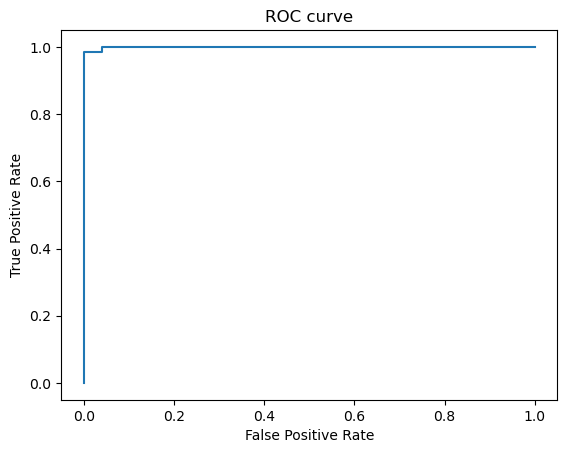

In [213]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = forest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [214]:
roc_auc_score(y_test, y_probs)

0.9994280403231572

## Hyperparameter Tuning

In [217]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
    
}

forest = RandomForestClassifier(n_jobs=-1, random_state=9)

grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='recall', verbose=2, n_jobs=-1)

In [218]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=9),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='recall', verbose=2)

In [220]:
best_forest = grid_search.best_estimator_
best_forest

RandomForestClassifier(max_depth=10, min_samples_split=5, n_jobs=-1,
                       random_state=9)

### Feature Importances

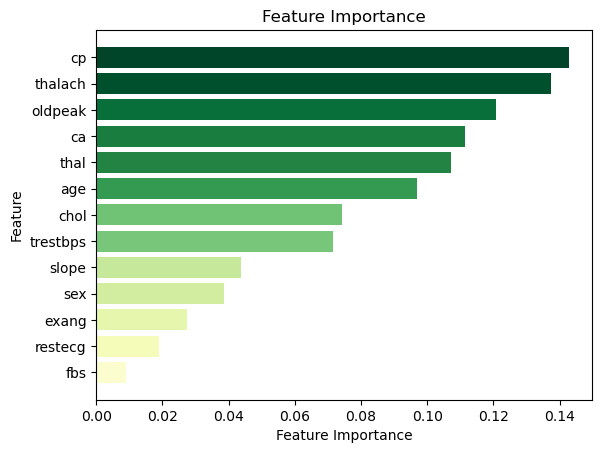

In [222]:
import numpy as np

feature_importances = best_forest.feature_importances_
features = best_forest.feature_names_in_

sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

colors = plt.cm.YlGn(sorted_importances / max(sorted_importances))

plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

<Axes: >

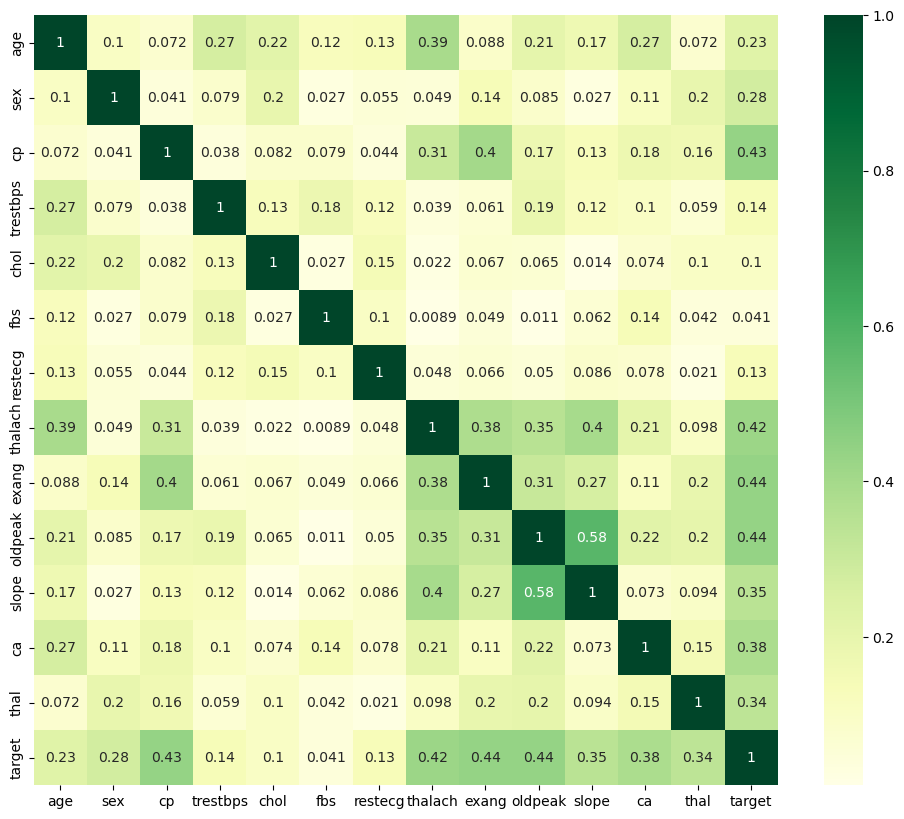

In [224]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(abs(df.corr()), annot=True, cmap='YlGn')